<a href="https://colab.research.google.com/github/wilberquito/AMLProject/blob/main/AMLProject.ju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project: Image Classification
## Advanced Machine Learning


> Wilber E. Bermeo Quito 
>
> Judit Quintana Massana
>
> April 2023

In [1]:
import zipfile
from pathlib import Path
import torch
import matplotlib.pyplot as plt

In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [3]:
if IN_COLAB:
    ! pip install torchvision
    ! pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

    !rm -rf data
    data_path = Path('/content/drive/MyDrive/AML/dataset_CIFAR10.zip')
    with zipfile.ZipFile(data_path,"r") as zip_ref:
        zip_ref.extractall("data")



Mounted at /content/drive


In [3]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    !rm -rf modular
    data_path = Path('/content/drive/MyDrive/AML/modular.zip')
    with zipfile.ZipFile(data_path,"r") as zip_ref:
        zip_ref.extractall(".")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import modular.utils as utils
utils.set_seeds(42)

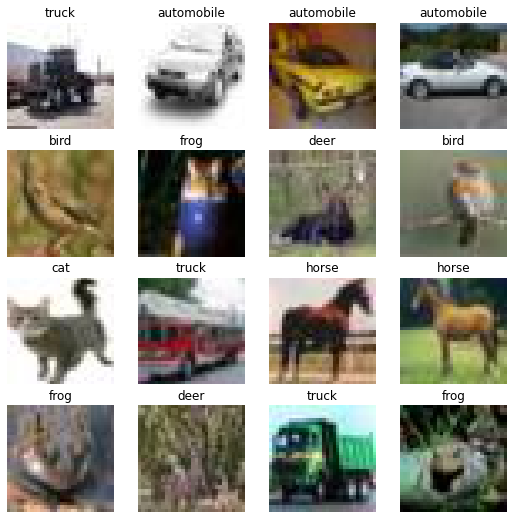

In [7]:
import torchvision
import modular.utils as utils
import torchvision.transforms as transforms

prev_dataset = torchvision.datasets.ImageFolder(root='data/train',transform=transforms.ToTensor())
utils.show_grid_preview(prev_dataset)

In [4]:
import modular.models as models
amlresnet50 = models.AMLResnet50_fastAI(10)
amlresnet50.transforms

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [7]:
import modular.datasets as datasets

train_dataloader = datasets.get_dataloader(folder_root='data/train',
                                           transformer=amlresnet50.transforms,
                                           batch_size=32,
                                           suffle=True)
validate_dataloader = datasets.get_dataloader(folder_root='data/validation',
                                              transformer=amlresnet50.transforms,
                                              batch_size=32,
                                              suffle=False)

train_dataloader, validate_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8497dc0790>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8497dc00d0>)

In [8]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## AML Resnet50

In [5]:
from torchinfo import summary

batch_size = 16
img_size = 256
summary(model=amlresnet50, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

forward torch.Size([32, 3, 256, 256])
torch.Size([32, 2048, 8, 8])
torch.Size([32, 4096, 1, 1])
forward torch.Size([32, 10])


Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
AMLResnet50_fastAI (AMLResnet50_fastAI)       [32, 3, 256, 256]    [32, 10]             --                   Partial
├─ResNet (net)                                [32, 3, 256, 256]    [32, 10]             --                   Partial
│    └─Conv2d (conv1)                         [32, 3, 256, 256]    [32, 64, 128, 128]   (9,408)              False
│    └─BatchNorm2d (bn1)                      [32, 64, 128, 128]   [32, 64, 128, 128]   (128)                False
│    └─ReLU (relu)                            [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
│    └─MaxPool2d (maxpool)                    [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
│    └─Sequential (layer1)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   False
│    │    └─Bottleneck (0)                    [32, 64, 64, 64]     [32, 256, 6

In [6]:
import torch
import modular.datasets as datasets
import modular.models as models 
from pathlib import Path

# Model
amlresnet50 = models.AMLResnet50_fastAI(10)

# Optimizer
optimizer = torch.optim.Adam(params=amlresnet50.parameters(),
                             lr=0.001)

# Criterion
loss = torch.nn.CrossEntropyLoss()

# Number of epochs to train the model
epochs = 10

# Default device to train model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(device)

# Where the model is saved
save_as = Path('trained/amlresnet50.pth')

# Data augmentation
train_transform, valid_transform = amlresnet50.transforms, amlresnet50.transforms

batch_size=800

train_dataloader = datasets.get_dataloader(folder_root='data/train',
                                           transformer=train_transform,
                                           batch_size=batch_size,
                                           suffle=True)
validate_dataloader = datasets.get_dataloader(folder_root='data/validation',
                                           transformer=valid_transform,
                                           batch_size=batch_size,
                                           suffle=False)

In [ ]:
! mkdir trained 

In [7]:
from modular.engine import train

results = train(model=amlresnet50,
                train_dataloader=train_dataloader,
                test_dataloader=validate_dataloader,
                optimizer=optimizer,
                criterion=loss,
                epochs=epochs,
                device=device,
                save_as=save_as)


results

  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 1 | train_loss: 1.3322 | train_acc: 0.5341 | test_loss: 1.0722 | test_acc: 0.6194


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 2 | train_loss: 1.0573 | train_acc: 0.6273 | test_loss: 1.0017 | test_acc: 0.6487


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 3 | train_loss: 0.9908 | train_acc: 0.6513 | test_loss: 0.9773 | test_acc: 0.6580


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 4 | train_loss: 0.9465 | train_acc: 0.6652 | test_loss: 0.9751 | test_acc: 0.6580


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 5 | train_loss: 0.9080 | train_acc: 0.6777 | test_loss: 0.9678 | test_acc: 0.6613


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 6 | train_loss: 0.8790 | train_acc: 0.6870 | test_loss: 0.9579 | test_acc: 0.6619


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 7 | train_loss: 0.8532 | train_acc: 0.6955 | test_loss: 0.9596 | test_acc: 0.6614


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 8 | train_loss: 0.8330 | train_acc: 0.7037 | test_loss: 0.9576 | test_acc: 0.6633


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 9 | train_loss: 0.8022 | train_acc: 0.7125 | test_loss: 0.9547 | test_acc: 0.6650


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch: 10 | train_loss: 0.7755 | train_acc: 0.7209 | test_loss: 0.9584 | test_acc: 0.6618


{'train_loss': [1.3321970891952515,
  1.0573291218280791,
  0.9907853806018829,
  0.9465296995639801,
  0.9079697871208191,
  0.8790172410011291,
  0.8531663489341735,
  0.8330328607559204,
  0.802241861820221,
  0.7755084431171417],
 'train_acc': [0.534125,
  0.6273,
  0.65135,
  0.66515,
  0.6777,
  0.686975,
  0.6955,
  0.7037,
  0.71245,
  0.7209],
 'test_loss': [1.0721849203109741,
  1.0016767740249635,
  0.9773397016525268,
  0.9750783944129944,
  0.9677705001831055,
  0.9579180741310119,
  0.9595988655090332,
  0.9576380181312562,
  0.954700345993042,
  0.9584007811546326],
 'test_acc': [0.6194,
  0.6487,
  0.658,
  0.658,
  0.6613,
  0.6619,
  0.6614,
  0.6633,
  0.665,
  0.6618]}

#Load

In [8]:
PATH = "/content/trained/amlresnet50.pth"

In [9]:
# Model class must be defined somewhere
model = torch.load(PATH)

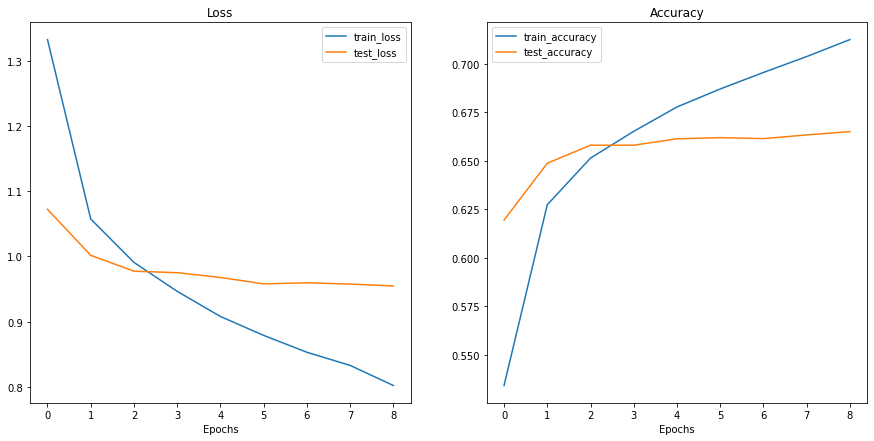

In [10]:
import modular.utils as utils
utils.plot_loss_curves(model)

In [11]:
from google.colab import files
files.download('/content/trained/amlresnet50.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
from torchinfo import summary
import fastai.vision.all as fv


dls = fv.ImageDataLoaders.from_folder('/content/data', train='train', valid='valid', 
                                      item_tfms=fv.Resize(460), batch_tfms=fv.aug_transforms(size=224))

learn = fv.cnn_learner(dls, fv.resnet50, metrics=[fv.accuracy, fv.top_k_accuracy])


batch_size = 16
img_size = 256
summary(model=learn, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pt

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
Sequential (Learner)                          [32, 3, 256, 256]    [32, 10]             --                   Partial
├─Sequential (0)                              [32, 3, 256, 256]    [32, 2048, 8, 8]     --                   Partial
│    └─Conv2d (0)                             [32, 3, 256, 256]    [32, 64, 128, 128]   (9,408)              False
│    └─BatchNorm2d (1)                        [32, 64, 128, 128]   [32, 64, 128, 128]   128                  True
│    └─ReLU (2)                               [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
│    └─MaxPool2d (3)                          [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
│    └─Sequential (4)                         [32, 64, 64, 64]     [32, 256, 64, 64]    --                   Partial
│    │    └─Bottleneck (0)                    [32, 64, 64, 64]     [32, 256, 

In [9]:
learn??

In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [14]:
from torchvision.models import resnet50, ResNet50_Weights

net = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

batch_size = 16
img_size = 256
summary(model=net, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 256, 256]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 256, 256]    [32, 64, 128, 128]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 128, 128]   [32, 64, 128, 128]   128                  True
├─ReLU (relu)                            [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
├─Sequential (layer1)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   True
│    └─Bottleneck (0)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   True
│    │    └─Conv2d (conv1)               [32, 64, 64, 64]     [32, 64, 64, 64]     4,096                True
│    │    └─BatchN

In [15]:
net.avgpool

AdaptiveAvgPool2d(output_size=(1, 1))

In [16]:
net.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [17]:
import torch.nn as nn

fc = nn.Sequential(
    nn.AdaptiveMaxPool2d((1,1)),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),
    nn.Linear(2048,512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.5),
    nn.Linear(512,10),
)

fc

Sequential(
  (0): AdaptiveMaxPool2d(output_size=(1, 1))
  (1): AdaptiveAvgPool2d(output_size=(1, 1))
  (2): Flatten(start_dim=1, end_dim=-1)
  (3): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): Linear(in_features=2048, out_features=512, bias=True)
  (6): ReLU()
  (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Dropout(p=0.5, inplace=False)
  (9): Linear(in_features=512, out_features=10, bias=True)
)

In [11]:
from torchvision.models import resnet50, ResNet50_Weights
import torch.nn as nn

net = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

net.fc = nn.Identity()
net.avgpool = nn.Identity()
fc = nn.Sequential(
    nn.AdaptiveMaxPool2d((1,1)),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten(),
    nn.BatchNorm1d(2048),
    nn.Dropout(0.5),
    nn.Linear(2048,512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Dropout(0.5),
    nn.Linear(512,10),
)

net.classifier = fc
net
batch_size = 16
img_size = 256
summary(model=net, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 256, 256]    [32, 131072]         1,059,338            True
├─Conv2d (conv1)                         [32, 3, 256, 256]    [32, 64, 128, 128]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 128, 128]   [32, 64, 128, 128]   128                  True
├─ReLU (relu)                            [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
├─Sequential (layer1)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   True
│    └─Bottleneck (0)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   True
│    │    └─Conv2d (conv1)               [32, 64, 64, 64]     [32, 64, 64, 64]     4,096                True
│    │    └─BatchN

In [ ]:
model.classifier = nn.Sequential(*[model.classifier[i] for i in range(4)])
net

In [13]:
net??